In [7]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


## keras 堆叠模型

In [3]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.categorical_accuracy])

In [7]:
import numpy as np
train_x = np.random.random((1000, 72))
train_y = np.random.random((1000, 10))
val_x = np.random.random((200, 72))
val_y = np.random.random((200, 10))
model.fit(train_x, train_y, epochs=10, batch_size=100,
          validation_data=(val_x, val_y))

Train on 1000 samples, validate on 200 samples
Epoch 1/10
1000/1000 [==============================] - 0s 475us/sample - loss: 11.9318 - categorical_accuracy: 0.1040 - val_loss: 12.0681 - val_categorical_accuracy: 0.1050
Epoch 2/10
1000/1000 [==============================] - 0s 30us/sample - loss: 12.4159 - categorical_accuracy: 0.1040 - val_loss: 12.9323 - val_categorical_accuracy: 0.0850
Epoch 3/10
1000/1000 [==============================] - 0s 29us/sample - loss: 13.6672 - categorical_accuracy: 0.0870 - val_loss: 14.7215 - val_categorical_accuracy: 0.0750
Epoch 4/10
1000/1000 [==============================] - 0s 29us/sample - loss: 15.9045 - categorical_accuracy: 0.0970 - val_loss: 17.6465 - val_categorical_accuracy: 0.1000
Epoch 5/10
1000/1000 [==============================] - 0s 29us/sample - loss: 19.3389 - categorical_accuracy: 0.1080 - val_loss: 21.6197 - val_categorical_accuracy: 0.1050
Epoch 6/10
1000/1000 [==============================] - 0s 29us/sample - loss: 23.4647 

In [9]:
test_x = np.random.random((1000, 72))
test_y = np.random.random((1000, 10))

model.evaluate(test_x, test_y, batch_size=32)

1000/1000 [==============================] - 0s 38us/sample - loss: 56.3595 - categorical_accuracy: 0.0890


[56.35947882080078, 0.089]

In [10]:
model.predict(test_x)

array([[1.13609815e-06, 4.39963710e-09, 6.00056246e-13, ...,
        2.10448071e-01, 1.08942135e-04, 3.01993615e-03],
       [5.94892617e-06, 4.09629379e-08, 1.05548677e-11, ...,
        2.24327385e-01, 1.72162268e-04, 6.30125776e-03],
       [8.56924089e-06, 6.37576960e-08, 1.22256727e-11, ...,
        1.98053017e-01, 2.16444823e-04, 7.91333150e-03],
       ...,
       [1.02347167e-05, 5.06844096e-08, 3.48560694e-11, ...,
        4.26875442e-01, 3.14823788e-04, 3.88961844e-03],
       [1.26333771e-06, 3.55623397e-09, 2.52151165e-13, ...,
        1.45974874e-01, 1.12772497e-04, 2.32446170e-03],
       [4.22254516e-06, 2.99279108e-08, 7.45401223e-12, ...,
        3.53763252e-01, 8.36234249e-05, 8.29309784e-03]], dtype=float32)

## keras函数式API

In [11]:
input_x = tf.keras.Input(shape=(72,))
hidden1 = layers.Dense(32, activation='relu')(input_x)
hidden2 = layers.Dense(16, activation='relu')(hidden1)
pred = layers.Dense(10, activation='softmax')(hidden2)

model = tf.keras.Model(inputs=input_x, outputs=pred)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 0s 242us/sample - loss: 12.3133 - accuracy: 0.1060
Epoch 2/5
1000/1000 [==============================] - 0s 67us/sample - loss: 17.5539 - accuracy: 0.1070
Epoch 3/5
1000/1000 [==============================] - 0s 67us/sample - loss: 32.0443 - accuracy: 0.0990
Epoch 4/5
1000/1000 [==============================] - 0s 64us/sample - loss: 60.1526 - accuracy: 0.1020
Epoch 5/5
1000/1000 [==============================] - 0s 60us/sample - loss: 102.4671 - accuracy: 0.0970


## 模型子类化

In [12]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.layer1 = layers.Dense(32, activation='relu')
        self.layer2 = layers.Dense(num_classes, activation='softmax')
    def call(self, inputs):
        h1 = self.layer1(inputs)
        out = self.layer2(h1)
        return out
    def compute_output_shape(self, input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.num_classes
        return tf.TensorShape(shape)

model = MyModel()
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=16, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 0s 299us/sample - loss: 13.6494 - accuracy: 0.1050
Epoch 2/10
1000/1000 [==============================] - 0s 121us/sample - loss: 17.9146 - accuracy: 0.0980
Epoch 3/10
1000/1000 [==============================] - 0s 119us/sample - loss: 21.7370 - accuracy: 0.0990
Epoch 4/10
1000/1000 [==============================] - 0s 117us/sample - loss: 24.3099 - accuracy: 0.0870
Epoch 5/10
1000/1000 [==============================] - 0s 115us/sample - loss: 26.4952 - accuracy: 0.0850
Epoch 6/10
1000/1000 [==============================] - 0s 113us/sample - loss: 27.0150 - accuracy: 0.0980
Epoch 7/10
1000/1000 [==============================] - 0s 112us/sample - loss: 26.3332 - accuracy: 0.0850
Epoch 8/10
1000/1000 [==============================] - 0s 112us/sample - loss: 25.3105 - accuracy: 0.0940
Epoch 9/10
1000/1000 [==============================] - 0s 115us/sample - loss: 24.6762 - accuracy: 0.0910
Epoch 10/10
1000/1000 [==============

## 回调

In [15]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='/home/yzk/logs')
]
model.fit(train_x, train_y, batch_size=16, epochs=5,
          callbacks=callbacks, validation_data=(val_x, val_y))

Train on 1000 samples, validate on 200 samples
Epoch 1/5
1000/1000 [==============================] - 0s 155us/sample - loss: 28.6291 - accuracy: 0.0900 - val_loss: 28.0314 - val_accuracy: 0.0800
Epoch 2/5
1000/1000 [==============================] - 0s 135us/sample - loss: 28.9576 - accuracy: 0.0850 - val_loss: 27.8878 - val_accuracy: 0.0800
Epoch 3/5
1000/1000 [==============================] - 0s 136us/sample - loss: 29.0269 - accuracy: 0.0830 - val_loss: 28.9413 - val_accuracy: 0.1000
Epoch 4/5
1000/1000 [==============================] - 0s 136us/sample - loss: 29.5299 - accuracy: 0.0820 - val_loss: 29.1710 - val_accuracy: 0.0950


## 多输入多输出模型

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

num_batches = 1000
batch_size = 50
learning_rate = 0.001

dataset = tfds.load("tf_flowers", split=tfds.Split.TRAIN, as_supervised=True)
dataset = dataset.map(lambda img, label: (tf.image.resize(img, [224, 224]) / 255.0, label)).shuffle(1024).batch(32)
model = tf.keras.applications.MobileNetV2(weights=None, classes=5)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
for images, labels in dataset:
    with tf.GradientTape() as tape:
        labels_pred = model(images)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=labels, y_pred=labels_pred)
        loss = tf.reduce_mean(loss)
        print("loss %f" % loss.numpy())
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.trainable_variables))

ImportError: IntProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [4]:
class QNetwork(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=24, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=24, activation=tf.nn.relu)
        self.dense3 = tf.keras.layers.Dense(units=2)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

    def predict(self, inputs):
        q_values = self(inputs)
        return tf.argmax(q_values, axis=-1)

In [26]:
pwd

'/home/yzk/dist/BaseLib'

In [25]:
import gym
from collections import deque
import random
import numpy as np
env = gym.make('CartPole-v1')       # 实例化一个游戏环境，参数为游戏名称
model = QNetwork()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
replay_buffer = deque(maxlen=10000) # 使用一个 deque 作为 Q Learning 的经验回放池
initial_epsilon= 0.001
final_epsilon = 0.01
epsilon = initial_epsilon
num_episodes = 100
num_exploration_episodes = 10
max_len_episode = 50
gamma = 0.01
tf.keras.backend.set_floatx('float64')
summary_writer = tf.summary.create_file_writer('./tensorboard') 
for episode_id in range(num_episodes):
    state = env.reset()             # 初始化环境，获得初始状态
    epsilon = max(                  # 计算当前探索率
        initial_epsilon * (num_exploration_episodes - episode_id) / num_exploration_episodes,
        final_epsilon)
    for t in range(max_len_episode):
#         env.render()                                # 对当前帧进行渲染，绘图到屏幕
        if random.random() < epsilon:               # epsilon-greedy 探索策略，以 epsilon 的概率选择随机动作
            action = env.action_space.sample()      # 选择随机动作（探索）
        else:
            action = model.predict(np.expand_dims(state, axis=0)).numpy()   # 选择模型计算出的 Q Value 最大的动作
            action = action[0]

        # 让环境执行动作，获得执行完动作的下一个状态，动作的奖励，游戏是否已结束以及额外信息
        next_state, reward, done, info = env.step(action)
        # 如果游戏Game Over，给予大的负奖励
        reward = -10. if done else reward
        # 将(state, action, reward, next_state)的四元组（外加 done 标签表示是否结束）放入经验回放池
        replay_buffer.append((state, action, reward, next_state, 1 if done else 0))
        # 更新当前 state
        state = next_state

        if done:                                    # 游戏结束则退出本轮循环，进行下一个 episode
            print("episode %d, epsilon %f, score %d" % (episode_id, epsilon, t))
            break

        if len(replay_buffer) >= batch_size:
            # 从经验回放池中随机取一个批次的四元组，并分别转换为 NumPy 数组
            batch_state, batch_action, batch_reward, batch_next_state, batch_done = zip(
                *random.sample(replay_buffer, batch_size))
            batch_state, batch_reward, batch_next_state, batch_done = \
                [np.array(a, dtype=np.float32) for a in [batch_state, batch_reward, batch_next_state, batch_done]]
            batch_action = np.array(batch_action, dtype=np.int32)
            
            q_value = model(batch_next_state)
            y = batch_reward + (gamma * tf.reduce_max(q_value, axis=1)) * (1 - batch_done)  # 计算 y 值
            with tf.GradientTape() as tape:
                loss = tf.keras.losses.mean_squared_error(  # 最小化 y 和 Q-value 的距离
                    y_true=y,
                    y_pred=tf.reduce_sum(model(batch_state) * tf.one_hot(batch_action, depth=2), axis=1)
                )
            
            with summary_writer.as_default():
                tf.summary.scalar('loss', loss, step=episode_id)
                tf.summary.scalar('reward', batch_reward.sum(), step=episode_id)
            grads = tape.gradient(loss, model.variables)
            optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))       # 计算梯度并

W1014 09:31:48.207993 140389822482176 base_layer.py:1814] Layer q_network_18 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



episode 3, epsilon 0.010000, score 46
episode 4, epsilon 0.010000, score 41
episode 7, epsilon 0.010000, score 45
episode 11, epsilon 0.010000, score 17
episode 12, epsilon 0.010000, score 15
episode 13, epsilon 0.010000, score 40
episode 14, epsilon 0.010000, score 35
episode 18, epsilon 0.010000, score 43
episode 19, epsilon 0.010000, score 44
episode 20, epsilon 0.010000, score 37
episode 22, epsilon 0.010000, score 34
episode 23, epsilon 0.010000, score 37
episode 24, epsilon 0.010000, score 49
episode 25, epsilon 0.010000, score 36
episode 26, epsilon 0.010000, score 38
episode 27, epsilon 0.010000, score 46
episode 31, epsilon 0.010000, score 48
episode 32, epsilon 0.010000, score 36
episode 33, epsilon 0.010000, score 31
episode 34, epsilon 0.010000, score 44
episode 35, epsilon 0.010000, score 49
episode 39, epsilon 0.010000, score 48
episode 40, epsilon 0.010000, score 45
episode 41, epsilon 0.010000, score 46
episode 42, epsilon 0.010000, score 32
episode 43, epsilon 0.010000

In [47]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import gym

In [2]:
GAME = 'Pendulum-v0'
env = gym.make(GAME)
N_A = env.action_space.shape[0]
N_S = env.observation_space.shape[0]
A_BOUND = [env.action_space.low, env.action_space.high]
ENTROPY_BETA = 0.01

class ACNet(tf.keras.Model):
    def __init__(self, globalAC=None):
        super().__init__()
        self.globalAC = globalAC
        self.la = tf.keras.layers.Dense(units=200, activation=tf.nn.relu)
        self.mu = tf.keras.layers.Dense(units=N_A, activation=tf.nn.tanh)  
        self.sigma = tf.keras.layers.Dense(units=N_A, activation=tf.nn.softplus)
        self.lc = tf.keras.layers.Dense(100, activation=tf.nn.relu)
        self.v = tf.keras.layers.Dense(N_A, activation=tf.nn.softmax)
            
    def call(self, state):
        x = self.la(state)
        mu = self.mu(x)
        sigma = self.sigma(x)
        v_s = self.lc(state)
        self.v_s = self.v(v_s)
        tf.multiply(mu, A_BOUND[1])
        sigma = sigma + 1e-4
        self.norm_dist = tfp.distributions.Normal(mu, sigma)
        return mu, sigma, self.v_s
    
    def choose_action(self, state):
        self(state)
        return tf.clip_by_value(self.norm_dist.sample(1), A_BOUND[0], A_BOUND[1])
    
    def update_global(self, state, a_his, v_target):
        mu, sigma, v_s = self(state)
        td = tf.subtract(v_target, v_s)
        
        entropy = self.norm_dist.entropy()
        a_prob = self.norm_dist.log_prob(a_his)
        
        exp_v = a_prob * tf.stop_gradient(td) + entropy * ENTROPY_BETA
        
#         update global net's paramerter
        with tf.GradientTape() as tape:
            c_loss = tf.reduce_mean(tf.square(td))
        grad_c = tape.gradient(c_loss, self.variables)
        
        with tf.GradientTape() as tape:
            a_loss = tf.reduce_mean(-exp_v)
        grad_a = tape.gradient(a_loss, self.variables)
        
        OPT_C.apply_gradients(grads_and_vars=zip(grad_c, self.globalAC.variables))
        OPT_A.apply_gradients(grads_and_vars=zip(grad_a, self.globalAC.variables))
        
    def pull_global(self):
        for l_param, g_param in zip(self.variables, self.globalAC.variables):
            l_param.assign(g_param)
        

In [3]:
net = ACNet()

In [4]:
s = env.reset()
a = env.action_space.sample()
s_, r, done, info = env.step(a)
s_

array([-0.79424086,  0.60760304,  0.32987289])

In [12]:
a = net.choose_action(s_.reshape((1, -1))).numpy().ravel()
net.norm_dist.entropy()
net.norm_dist.prob(0.0).numpy().ravel()

array([0.55463505], dtype=float32)

In [36]:
MAX_GLOBAL_EP = 1000
MAX_EPISODE = 200
UPDATE_GLOBAL_ITER = 10
GLOABL_REWARD_R = []
GLOBAL_EP = 0
GAMMA = 0.9
        
class Worker():
    def __init__(self,name, globalAC):
        self.env = gym.make(GAME).unwrapped
        self.name = name 
        self.ACNet = ACNet(globalAC)
    def work(self):
        total_step = 1
        buffer_s, buffer_a, buffer_r = [], [], []
        global GLOBAL_EP, GLOABL_REWARD_R
        while not COORD.should_stop() and GLOBAL_EP < MAX_GLOBAL_EP:
            ep_r = 0
            s = self.env.reset()
            for ep_t in range(MAX_EPISODE):
                a = self.ACNet.choose_action(s.reshape(1, -1)).numpy().ravel()
                s_ , r, done, info = self.env.step(a)
                ep_r += r
                done = True if ep_t == MAX_EPISODE -1 else False
                buffer_s.append(s)
                buffer_a.append(a)
                buffer_r.append((r +  8)/ 8)
                if total_step % UPDATE_GLOBAL_ITER ==0 or done:
                    if done:
                        v_s_ = 0
                    else:
                        v_s_ = self.ACNet(s_.reshape(1, -1))[-1].numpy().ravel()
                    buffer_v_target = []
                    for item in buffer_r[::-1]:
                        v_s_  = v_s_ * GAMMA + item
                        buffer_v_target.append(v_s_)
                    buffer_v_target.reverse()
                    buffer_s, buffer_a, buffer_v_target = np.vstack(buffer_s), np.vstack(buffer_a), np.vstack(buffer_v_target)
                    self.ACNet.update_global(buffer_s, buffer_a, buffer_v_target)
                    buffer_a,buffer_s,buffer_r = [],[],[]
                    self.ACNet.pull_global()

                total_step += 1
                s = s_
                if done:
                    if len(GLOABL_REWARD_R) == 0:
                        GLOABL_REWARD_R.append(ep_r)
                    else:
                        GLOABL_REWARD_R.append(GLOABL_REWARD_R[-1]*0.9 + 0.1*ep_r)
                    print(self.name, "EP:",GLOBAL_EP, "Reward:", GLOABL_REWARD_R[-1])
                    GLOBAL_EP +=1    
                    break

In [ ]:
import multiprocessing
import threading
from concurrent.futures import ThreadPoolExecutor
LR_A = 0.0001
LR_C = 0.001
N_WORKERS = multiprocessing.cpu_count()
summary_writer = tf.summary.create_file_writer('./tensorboard') 
with tf.device("/cpu:0"):
    OPT_A = tf.keras.optimizers.RMSprop(LR_A)
    OPT_C = tf.keras.optimizers.RMSprop(LR_C)
    GLOBAL_AC = ACNet()  # we only need its params
    workers = []
    # Create worker
    for i in range(N_WORKERS):
        i_name = 'W_%i' % i   # worker name
        workers.append(Worker(i_name, GLOBAL_AC))
COORD = tf.train.Coordinator()

worker_threads = []
for worker in workers:
    job = lambda: worker.work()
    t = threading.Thread(target=job)
    t.start()
    worker_threads.append(t)
COORD.join(worker_threads)
# with ThreadPoolExecutor(max_workers=N_WORKERS) as executor:
#     for worker in workers:
#         job = lambda: worker.work()
#         executor.submit(job)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(GLOABL_REWARD_R)), GLOABL_REWARD_R)
plt.xlabel('step')
plt.ylabel('Total moving reward')
plt.show()

In [37]:
EP_MAX = 1000
EP_LEN = 200
GAMMA = 0.9
A_LR = 0.0001
C_LR = 0.0002
BATCH = 32
A_UPDATE_STEPS = 10
C_UPDATE_STEPS = 10
S_DIM, A_DIM = 3, 1
METHOD = [
    dict(name='kl_pen', kl_target=0.01, lam=0.5),   # KL penalty
    dict(name='clip', epsilon=0.2),                 # Clipped surrogate objective, find this is better
][1]        # choose the method for optimization

In [38]:
METHOD

{'name': 'clip', 'epsilon': 0.2}

In [39]:
class ActionNet(tf.keras.Model):
    def __init__(self, trainable):
        super().__init__()
        self.l1 = tf.keras.layers.Dense(100, tf.nn.relu, trainable=trainable)
        self.mu = tf.keras.layers.Dense(A_DIM, tf.nn.tanh, trainable=trainable)
        self.sigma = tf.keras.layers.Dense(A_DIM, tf.nn.softplus, trainable=trainable)
    def call(self, state):
        if state.ndim < 2:
            state = state[np.newaxis, :]
        x = self.l1(state)
        mu = self.mu(x)
        sigma = self.sigma(x)
        self.norm_dist = tfp.distributions.Normal(mu, sigma)
        return mu, sigma
        
    def choose_action(self, state):
        self(state)
        a = self.norm_dist.sample(1).numpy().ravel()
        return np.clip(a, -2, 2)
    
class CriticNet(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.l1 = tf.keras.layers.Dense(100, tf.nn.relu)
        self.v = tf.keras.layers.Dense(1)
    def call(self, state):
        if state.ndim < 2:
            state = state[np.newaxis, :]
        x = self.l1(state)
        return self.v(x)

In [40]:
env = gym.make('Pendulum-v0').unwrapped

In [41]:
net = ActionNet(True)

In [42]:
s1 = env.observation_space.sample()
s2 = env.observation_space.sample()
s = np.vstack((s1, s2))
cnet = CriticNet()
cnet(s)

<tf.Tensor: id=2402, shape=(2, 1), dtype=float32, numpy=
array([[-1.6098924 ],
       [-0.67997926]], dtype=float32)>

In [43]:
state = env.observation_space.sample()
opt = tf.keras.optimizers.Adam(0.001)

In [44]:
net.choose_action(state)

array([0.07725426], dtype=float32)

In [45]:
class PPO():
    def __init__(self):
        self.pi = ActionNet(True)
        self.oldpi = ActionNet(False)
        self.critic_net = CriticNet()
        
    
    def update_old_pi(self):
        for pi_param, oldpi_param in zip(self.pi.variables, self.oldpi.variables):
            oldpi_param.assign(pi_param)
            
    def train_critic(self, s, r):
        with tf.GradientTape() as tape:
            v = self.critic_net(s)
            discounted_r = r
            advantage = discounted_r - v
            closs = tf.reduce_mean(tf.square(advantage))
        grad = tape.gradient(closs, self.critic_net.variables)
        tf.keras.optimizers.Adam(LR_C).apply_gradients(grads_and_vars=zip(grad, self.critic_net.variables))
    
    def train_kl(self, s, a, adv):
        self.pi(s)
        self.oldpi(s)
        ratio = self.pi.norm_dist.prob(a) / self.oldpi.norm_dist.prob(a)
        surrogate = ratio * adv
        kl = tfp.distributions.kl_divergence(self.pi.norm_dist, self.oldpi.norm_dist)
        self.kl_mean = tf.reduce_mean(kl)
        with tf.GradientTape() as tape:
            aloss = - (tf.reduce_mean(surrogate - kl * METHOD['lam']))
        grad = tape.gradient(aloss, self.pi.variables)
        tf.keras.optimizers.Adam(LR_A).apply_gradients(grads_and_vars=zip(grad, self.pi.variables))

    
    def train_clip(self, s, a, adv):
        with tf.GradientTape() as tape:
            pi_dist = tfp.distributions.Normal(*(self.pi(s)))
            oldpi_dist = tfp.distributions.Normal(*(self.oldpi(s)))
            ratio = pi_dist.prob(a) / oldpi_dist.prob(a)
            surrogate = ratio * adv
            aloss = -tf.reduce_mean(
                    tf.minimum(
                    surrogate,
                    tf.clip_by_value(ratio, 1.-METHOD['epsilon'], 1.+METHOD['epsilon'])*adv))
        grad = tape.gradient(aloss, self.pi.variables)
        tf.keras.optimizers.Adam(LR_A).apply_gradients(grads_and_vars=zip(grad, self.pi.variables))

        
    
    def update(self, s, a, r):
        self.update_old_pi()
        
        v_target = self.critic_net(s).numpy().ravel()
        advantage = r - v_target
        
        if METHOD['name'] == 'kl_pen':
            for _ in range(A_UPDATE_STEPS):
                self.train_kl(s, a, advantage)
                if self.kl_mean > 4*METHOD['kl_target']:
                    break
            if kl < METHOD['kl_target'] / 1.5: 
                METHOD['lam'] /= 2
            elif kl > METHOD['kl_target'] * 1.5:
                METHOD['lam'] *= 2
            METHOD['lam'] = np.clip(METHOD['lam'], 1e-4, 10) 
        else:
            for _ in range(A_UPDATE_STEPS):
                self.train_clip(s, a, advantage)
        
        for _ in range(C_UPDATE_STEPS):
            self.train_critic(s, r)    

In [46]:
all_ep_r = []
ppo = PPO()
for ep in range(EP_MAX):
    s = env.reset()
    buffer_s, buffer_a, buffer_r = [], [], []
    ep_r = 0
    for t in range(EP_LEN):    # in one episode
#         s = env.render()
        a = ppo.pi.choose_action(s)
        s_, r, done, _ = env.step(a)
        buffer_s.append(s)
        buffer_a.append(a)
        buffer_r.append((r+8)/8)    # normalize reward, find to be useful
        s = s_
        ep_r += r

        # update ppo
        if (t+1) % BATCH == 0 or t == EP_LEN-1:
            v_s_ = ppo.critic_net(s).numpy().ravel()
            discounted_r = []
            for r in buffer_r[::-1]:
                v_s_ = r + GAMMA * v_s_
                discounted_r.append(v_s_)
            discounted_r.reverse()

            bs, ba, br = np.vstack(buffer_s), np.vstack(buffer_a), np.array(discounted_r)[:, np.newaxis]
            buffer_s, buffer_a, buffer_r = [], [], []
            ppo.update(bs, ba, br)
    if ep == 0: all_ep_r.append(ep_r)
    else: all_ep_r.append(all_ep_r[-1]*0.9 + ep_r*0.1)
    print(
        'Ep: %i' % ep,
        "|Ep_r: %i" % ep_r,
        ("|Lam: %.4f" % METHOD['lam']) if METHOD['name'] == 'kl_pen' else '',
    )

plt.plot(np.arange(len(all_ep_r)), all_ep_r)
plt.xlabel('Episode');plt.ylabel('Moving averaged episode reward');plt.show()
    

W1024 13:49:27.251112 140586545706752 base_layer.py:1814] Layer action_net_6 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

W1024 13:49:27.382491 140586545706752 base_layer.py:1814] Layer critic_net_5 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype de

Ep: 0 |Ep_r: -1884 
Ep: 1 |Ep_r: -1487 
Ep: 2 |Ep_r: -1206 
Ep: 3 |Ep_r: -1280 
Ep: 4 |Ep_r: -1382 
Ep: 5 |Ep_r: -1529 
Ep: 6 |Ep_r: -1619 
Ep: 7 |Ep_r: -1708 
Ep: 8 |Ep_r: -1752 
Ep: 9 |Ep_r: -1608 
Ep: 10 |Ep_r: -1560 
Ep: 11 |Ep_r: -1160 
Ep: 12 |Ep_r: -1178 
Ep: 13 |Ep_r: -1387 
Ep: 14 |Ep_r: -1468 
Ep: 15 |Ep_r: -1515 
Ep: 16 |Ep_r: -1146 
Ep: 17 |Ep_r: -1248 
Ep: 18 |Ep_r: -965 
Ep: 19 |Ep_r: -1276 
Ep: 20 |Ep_r: -1151 
Ep: 21 |Ep_r: -1449 
Ep: 22 |Ep_r: -1062 
Ep: 23 |Ep_r: -871 
Ep: 24 |Ep_r: -1174 
Ep: 25 |Ep_r: -1449 
Ep: 26 |Ep_r: -1168 
Ep: 27 |Ep_r: -966 
Ep: 28 |Ep_r: -1262 
Ep: 29 |Ep_r: -1174 
Ep: 30 |Ep_r: -1067 
Ep: 31 |Ep_r: -1661 
Ep: 32 |Ep_r: -1093 
Ep: 33 |Ep_r: -1506 
Ep: 34 |Ep_r: -965 
Ep: 35 |Ep_r: -863 
Ep: 36 |Ep_r: -761 
Ep: 37 |Ep_r: -1186 
Ep: 38 |Ep_r: -1067 
Ep: 39 |Ep_r: -1529 
Ep: 40 |Ep_r: -1585 
Ep: 41 |Ep_r: -1330 
Ep: 42 |Ep_r: -1546 
Ep: 43 |Ep_r: -1186 
Ep: 44 |Ep_r: -1189 
Ep: 45 |Ep_r: -1094 
Ep: 46 |Ep_r: -1161 
Ep: 47 |Ep_r: -1155 
Ep: 48 |

Ep: 379 |Ep_r: -1189 
Ep: 380 |Ep_r: -1144 
Ep: 381 |Ep_r: -1116 
Ep: 382 |Ep_r: -1195 
Ep: 383 |Ep_r: -1404 
Ep: 384 |Ep_r: -1147 
Ep: 385 |Ep_r: -1209 
Ep: 386 |Ep_r: -1545 
Ep: 387 |Ep_r: -1214 
Ep: 388 |Ep_r: -1164 
Ep: 389 |Ep_r: -1298 
Ep: 390 |Ep_r: -1398 
Ep: 391 |Ep_r: -1424 
Ep: 392 |Ep_r: -1079 
Ep: 393 |Ep_r: -1212 
Ep: 394 |Ep_r: -1050 
Ep: 395 |Ep_r: -1193 
Ep: 396 |Ep_r: -1143 
Ep: 397 |Ep_r: -1239 
Ep: 398 |Ep_r: -1026 
Ep: 399 |Ep_r: -1201 
Ep: 400 |Ep_r: -1203 
Ep: 401 |Ep_r: -1203 
Ep: 402 |Ep_r: -1057 
Ep: 403 |Ep_r: -1180 
Ep: 404 |Ep_r: -1173 
Ep: 405 |Ep_r: -1287 
Ep: 406 |Ep_r: -1192 
Ep: 407 |Ep_r: -1288 
Ep: 408 |Ep_r: -1322 
Ep: 409 |Ep_r: -878 
Ep: 410 |Ep_r: -1312 
Ep: 411 |Ep_r: -1244 
Ep: 412 |Ep_r: -1195 
Ep: 413 |Ep_r: -1315 
Ep: 414 |Ep_r: -1177 
Ep: 415 |Ep_r: -1217 
Ep: 416 |Ep_r: -1243 
Ep: 417 |Ep_r: -1203 
Ep: 418 |Ep_r: -1209 
Ep: 419 |Ep_r: -1203 
Ep: 420 |Ep_r: -1245 
Ep: 421 |Ep_r: -1167 
Ep: 422 |Ep_r: -1216 
Ep: 423 |Ep_r: -1262 
Ep: 424 |Ep

Ep: 753 |Ep_r: -1051 
Ep: 754 |Ep_r: -1180 
Ep: 755 |Ep_r: -1016 
Ep: 756 |Ep_r: -1065 
Ep: 757 |Ep_r: -1050 
Ep: 758 |Ep_r: -1103 
Ep: 759 |Ep_r: -1065 
Ep: 760 |Ep_r: -1122 
Ep: 761 |Ep_r: -1054 
Ep: 762 |Ep_r: -1104 
Ep: 763 |Ep_r: -1093 
Ep: 764 |Ep_r: -1033 
Ep: 765 |Ep_r: -1166 
Ep: 766 |Ep_r: -1053 
Ep: 767 |Ep_r: -1012 
Ep: 768 |Ep_r: -1048 
Ep: 769 |Ep_r: -917 
Ep: 770 |Ep_r: -1152 
Ep: 771 |Ep_r: -1083 
Ep: 772 |Ep_r: -926 
Ep: 773 |Ep_r: -1052 
Ep: 774 |Ep_r: -1241 
Ep: 775 |Ep_r: -1053 
Ep: 776 |Ep_r: -1100 
Ep: 777 |Ep_r: -1046 
Ep: 778 |Ep_r: -1015 
Ep: 779 |Ep_r: -1044 
Ep: 780 |Ep_r: -1093 
Ep: 781 |Ep_r: -1030 
Ep: 782 |Ep_r: -1094 
Ep: 783 |Ep_r: -1048 
Ep: 784 |Ep_r: -983 
Ep: 785 |Ep_r: -1068 
Ep: 786 |Ep_r: -1003 
Ep: 787 |Ep_r: -1024 
Ep: 788 |Ep_r: -1025 
Ep: 789 |Ep_r: -1130 
Ep: 790 |Ep_r: -1002 
Ep: 791 |Ep_r: -1043 
Ep: 792 |Ep_r: -1274 
Ep: 793 |Ep_r: -1141 
Ep: 794 |Ep_r: -1121 
Ep: 795 |Ep_r: -1023 
Ep: 796 |Ep_r: -1289 
Ep: 797 |Ep_r: -1266 
Ep: 798 |Ep_r

NameError: name 'plt' is not defined

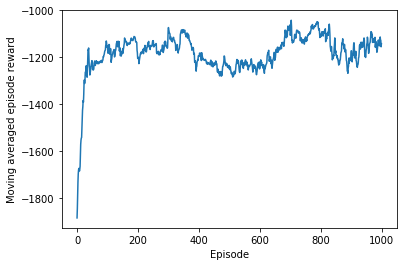

In [50]:
import matplotlib.pyplot as plt
A = np.array([[2, 1], [1, 2]])
plt.plot(np.arange(len(all_ep_r)), all_ep_r)
plt.xlabel('Episode');plt.ylabel('Moving averaged episode reward')
plt.show()

In [156]:
x, y = np.meshgrid(np.arange(-50, 50), np.arange(-50, 50))

In [157]:
Z = x * x * A[0, 0] + 2* x*y *A[0, 1] + y *y *A[1, 1]

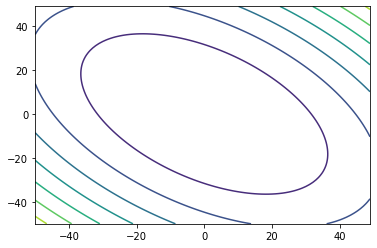

In [171]:
plt.contour(x, y, Z)
# plt.scatter(30, 30, c='b')
# plt.scatter(-10, -10, c='b')
# plt.plot([-10, 30], [-10, 30], c='r')

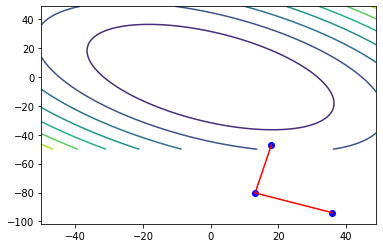

In [189]:
x0, y0 = np.random.randint(-50, 50), np.random.randint(-50, 50)
X0 = np.array([x0, y0])
plt.scatter(x0, y0, c='b')
d0 = np.dot(A, X0)
r0 = d0
alpha0 = np.dot(r0.T, r0) / np.dot(np.dot(d0.T, A), d0)
X1 = X0 + alpha0 * d0
plt.scatter(X1[0], X1[1], c='b')
plt.plot([X0[0], X1[0]], [X0[1], X1[1]], c='r')

r1 = r0 - alpha0 * np.dot(A, d0)
beta1 = np.dot(r1.T, r1) / np.dot(r0.T, r0)
d1 = r1 + beta1 * d0

alpha1 = np.dot(r1.T, r1) / np.dot(np.dot(d1.T, A), d1)
X2 = X1 + alpha1 * d1
plt.scatter(X2[0], X2[1], c='b')
plt.plot([X1[0], X2[0]], [X1[1], X2[1]], c='r')
plt.contour(x, y, Z)

# DPPO

In [53]:
x = np.arange(-5.12, 5.12, step=0.001)

In [56]:
n = len(x)
cs = np.cumsum(x**2 - np.cos(2*np.pi*x))

In [58]:
An = 10 * np.arange(1, n+1)

In [59]:
f = An + cs

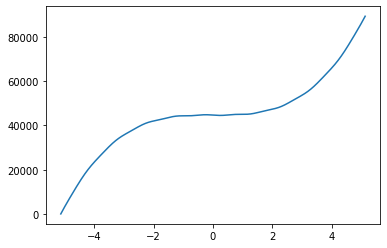

In [61]:
plt.plot(x, cs)